# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename,header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

 My goal is to train a machine learning model that predicts whether a higher host response rate correlates with better reviews of an Airbnb listing. It predicts wether a review is low or high review.
 This is an example supervised learning and is a binary classification since my label is low review and high review. In our dataset the label contains high review and low review.

the features are: 
- Host_response_rate
- host_is_superhost
- host_listings_count
- calculated_host_listings_count
- reviews_per_month
- description
- host_location
- host_name
This an important problem because it tells us better reviews often correlate with improved trust and perceived quality. By linking response rates to review quality, the platform can enhance its reputation for providing high-quality and reliable listings and it can enhance the guest experience, and make the host to engage more on the bookings. By this the company can build a trust or loyalty with their clients.

In [3]:
# Let’s inspect the values in the host_response_rate column
df['host_response_rate']

0        0.80
1        0.09
2        1.00
3        1.00
4         NaN
         ... 
28017    1.00
28018    0.91
28019    0.99
28020    0.90
28021     NaN
Name: host_response_rate, Length: 28022, dtype: float64

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# identify feature: creating a list of feature names 
list(df.loc[:, df.columns != 'host_response_rate'])

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_c

In [5]:
# part of the preparation involves cleaning the data,   missing values and encoding . 
# I had to do one by one, it was the only way that it could work for some reasons

In [5]:
df.drop(columns=['bedrooms'],inplace=True)


In [6]:
df.drop(columns=['neighborhood_overview'],inplace=True)


In [7]:
#df.drop(columns=['host_response_rate'],inplace=True)


In [8]:
df.drop(columns=['host_acceptance_rate'],inplace=True)


In [9]:
df.drop(columns=['host_about','host_location','description','beds','name'],inplace=True)


In [10]:
np.sum(df.isnull(),axis=0)

host_name                                           0
host_response_rate                              11843
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
amenities                                           0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights      

In [11]:
print(df.columns)


Index(['host_name', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calcul

In [12]:
df.head(20)

,host_name,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Jennifer,0.80,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,LisaRoxanne,0.09,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,Rebecca,1.00,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Shunichi,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,MaryEllen,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,Laurie,1.00,True,3.0,3.0,True,True,Brooklyn,Private room,2,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Allen & Irina,1.00,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,Cyn,1.00,True,3.0,3.0,True,True,Manhattan,Private room,1,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,Joelle,1.00,True,2.0,2.0,True,True,Brooklyn,Private room,1,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Jane,1.00,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [13]:
print(df.describe())

       host_response_rate  host_listings_count  host_total_listings_count  \
count        16179.000000         28022.000000               28022.000000   
mean             0.906901            14.554778                  14.554778   
std              0.227282           120.721287                 120.721287   
min              0.000000             0.000000                   0.000000   
25%              0.940000             1.000000                   1.000000   
50%              1.000000             1.000000                   1.000000   
75%              1.000000             3.000000                   3.000000   
max              1.000000          3387.000000                3387.000000   

       accommodates     bathrooms         price  minimum_nights  \
count  28022.000000  28022.000000  28022.000000    28022.000000   
mean       2.874491      1.142174    154.228749       18.689387   
std        1.860251      0.421132    140.816605       25.569151   
min        1.000000      0.000000     

In [14]:
df.dtypes

host_name                                        object
host_response_rate                              float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
amenities                                        object
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
minimum_maximum_nights                          

In [15]:
to_encode=list(df.select_dtypes(include=['object']).columns)

In [16]:
df[to_encode].nunique()

host_name                        7566
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

In [17]:
top=list(df['amenities'].value_counts().head(1).index)
top

['["Hangers", "Long term stays allowed", "Iron", "TV", "Carbon monoxide alarm", "Fire extinguisher", "Elevator", "Hair dryer", "Wifi", "Heating", "Shampoo", "Smoke alarm", "First aid kit", "Air conditioning", "Essentials"]']

In [18]:
for value in top:
    df['amenities_'+ value]=np.where(df['amenities']==value,1,0)

In [19]:
df.drop(columns='amenities',inplace=True)
to_encode.remove('amenities')

In [20]:
df.columns

Index(['host_name', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_lis

In [21]:
df.head

<bound method NDFrame.head of          host_name  host_response_rate  host_is_superhost  \
0         Jennifer                0.80               True   
1      LisaRoxanne                0.09               True   
2          Rebecca                1.00               True   
3         Shunichi                1.00               True   
4        MaryEllen                 NaN               True   
...            ...                 ...                ...   
28017        Vicky                1.00               True   
28018       Samuel                0.91               True   
28019       Carlos                0.99               True   
28020        Lexia                0.90               True   
28021      Justine                 NaN               True   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                      8.0                        8.0                  True   
1                      1.0                        1.0                  True   


In [22]:
for colname in to_encode:
    df_encoded=pd.get_dummies(df[colname],prefix=colname +'_')
    df=df.join(df_encoded)

In [23]:
df.head

<bound method NDFrame.head of          host_name  host_response_rate  host_is_superhost  \
0         Jennifer                0.80               True   
1      LisaRoxanne                0.09               True   
2          Rebecca                1.00               True   
3         Shunichi                1.00               True   
4        MaryEllen                 NaN               True   
...            ...                 ...                ...   
28017        Vicky                1.00               True   
28018       Samuel                0.91               True   
28019       Carlos                0.99               True   
28020        Lexia                0.90               True   
28021      Justine                 NaN               True   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                      8.0                        8.0                  True   
1                      1.0                        1.0                  True   


In [24]:
df.drop(columns=to_encode,axis=1,inplace=True)

In [25]:
df.isnull().values.any()

True

In [26]:
# this will be my feature 
list(df.loc[:,df.columns!='host_response_rate'])

['host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bathrooms',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'n_host_verifications',
 'amenities_["Hangers", "Long term stays a

In [27]:
value = df['host_response_rate'].mean()
df['host_response_rate'].fillna(value, inplace=True)

In [28]:
np.sum(df.isnull(),axis=0)

host_response_rate                             0
host_is_superhost                              0
host_listings_count                            0
host_total_listings_count                      0
host_has_profile_pic                           0
                                              ..
neighbourhood_group_cleansed__Staten Island    0
room_type__Entire home/apt                     0
room_type__Hotel room                          0
room_type__Private room                        0
room_type__Shared room                         0
Length: 7614, dtype: int64

In [29]:
df.isnull().values.any()

False

In [30]:
data = {'review_score': [2.5, 3.6, 4.7, 3.2, 5.0, 2.8, 3.7, 4.8, 3.1, 5.1]}  # Continuous review scores
df = pd.DataFrame(data)

# Define threshold
threshold = 4

# Convert continuous values to binary categories
df['review_category'] = df['review_score'].apply(lambda x: 'high' if x >= threshold else 'not high')

print(df)

   review_score review_category
0           2.5        not high
1           3.6        not high
2           4.7            high
3           3.2        not high
4           5.0            high
5           2.8        not high
6           3.7        not high
7           4.8            high
8           3.1        not high
9           5.1            high


In [31]:
from sklearn.preprocessing import LabelEncoder

df['review_category'] = df['review_score'].apply(lambda x: '5' if x >= threshold else '2')
label_encoder= LabelEncoder()
df['review_encoded'] = label_encoder.fit_transform(df['review_category'])

print(df)

   review_score review_category  review_encoded
0           2.5               2               0
1           3.6               2               0
2           4.7               5               1
3           3.2               2               0
4           5.0               5               1
5           2.8               2               0
6           3.7               2               0
7           4.8               5               1
8           3.1               2               0
9           5.1               5               1


In [32]:
y=df['review_encoded']
X=df.drop(columns='review_score',axis=1)


In [33]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 10

Number of Features:2
['review_category', 'review_encoded']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

In [ ]:
All my preparation codes are above in part 3, I will be describing how I did and the procedure
My new feature list are: review_category and review_encoded. I chose to remove host_response_rate since it had so many missing values.
All data preparation techniques that I used: 
- First, created a list containing the features in the dataset
-  I checked all the features, if there any missing values
- Check if a given value in any data cell is missing, and sum up
the resulting values (True/False) by columns.
- Once, I found the missing values I cleaned my data 
- I identify the Features that Should be One-Hot Encoded. I Find all of the columns whose
values are of type ’object’ and add the column names to a list named to_encode
- After, I Find the number of unique values each column in to_encode has 
_ I started One-Hot Encode the Features
# Training model in part 5
- My plan to train my model is to use LogistRegression since I am working with binary classification
I also did a grid_search in the logisticRegression to find hyperparameters for my model to see the performance of my model.
- And I also wanted to Compute the AUC to evaluate the performance for all possible threshold values.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [34]:
# All the packages used: 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [35]:
# I had a very low dataset value, make_classification helped me to increase my dataset so i 
# can perform a good grid_search. My classes only had 2, and which means that my Grid_search would fail everytime. 

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

print(X.shape, y.shape)

(1000, 20) (1000,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)

(670, 20)
(330, 20)


In [38]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
proba_predictions = model.predict_proba(X_test)
proba_predictions_default = []
for i in proba_predictions:
    proba_predictions_default.append(i[1])
    

In [40]:
class_label_predictions_default = model.predict(X_test)

In [41]:
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True,False])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: high review', 'Predicted: low review'],
    index=['Actual: high review', 'Actual: low review']
)

print(confusion_df)

                     Predicted: high review  Predicted: low review
Actual: high review                     140                     27
Actual: low review                       20                    143


In [42]:
cs=[10**i for i in range(-5,5)]
param_grid = dict(C = list(cs))
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [43]:
model = LogisticRegression(max_iter=1000)

grid = GridSearchCV(model, param_grid, cv=5)

grid_search = grid.fit(X_train, y_train)
print('Done')


Done


In [44]:
best_C = grid_search.best_params_['C']
best_C

0.01

In [45]:
model_best = LogisticRegression(C = best_C, max_iter=1000)
model_best.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [46]:
proba_predictions = model_best.predict_proba(X_test)
proba_predictions_best = []
for i in proba_predictions:
    proba_predictions_best.append(i[1])

class_label_predictions_best = model_best.predict(X_test)

In [47]:
c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True,False])
pd.DataFrame(
c_m,
columns=['Predicted: low review', 'Predicted: high review'],
index=['Actual: low review Host', 'Actual: high review ']
)

,Predicted: low review,Predicted: high review
Actual: low review Host,137,30
Actual: high review,18,145


In [48]:
precision_default, recall_default, thresholds_default=precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test,proba_predictions_best)

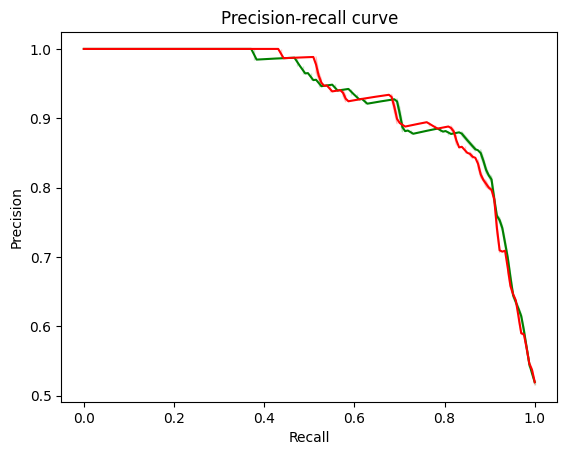

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=recall_default, y=precision_default, color='g')
sns.lineplot(x=recall_best, y=precision_best, color='r')
plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [50]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test,proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

In [51]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)
print(auc_default)
print(auc_best)

0.9142941111641746
0.911979721538518
